In [1]:
# added below to not get any error, this requirement is generated via pip freeze, I usually prefer --no-dep
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pandas import DataFrame

In [3]:

def plot_correlation_matrix(df: DataFrame):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()
    plt.savefig("correlation_heatmap.png")


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
target
1    357
0    212
Name: count, dtype: int64


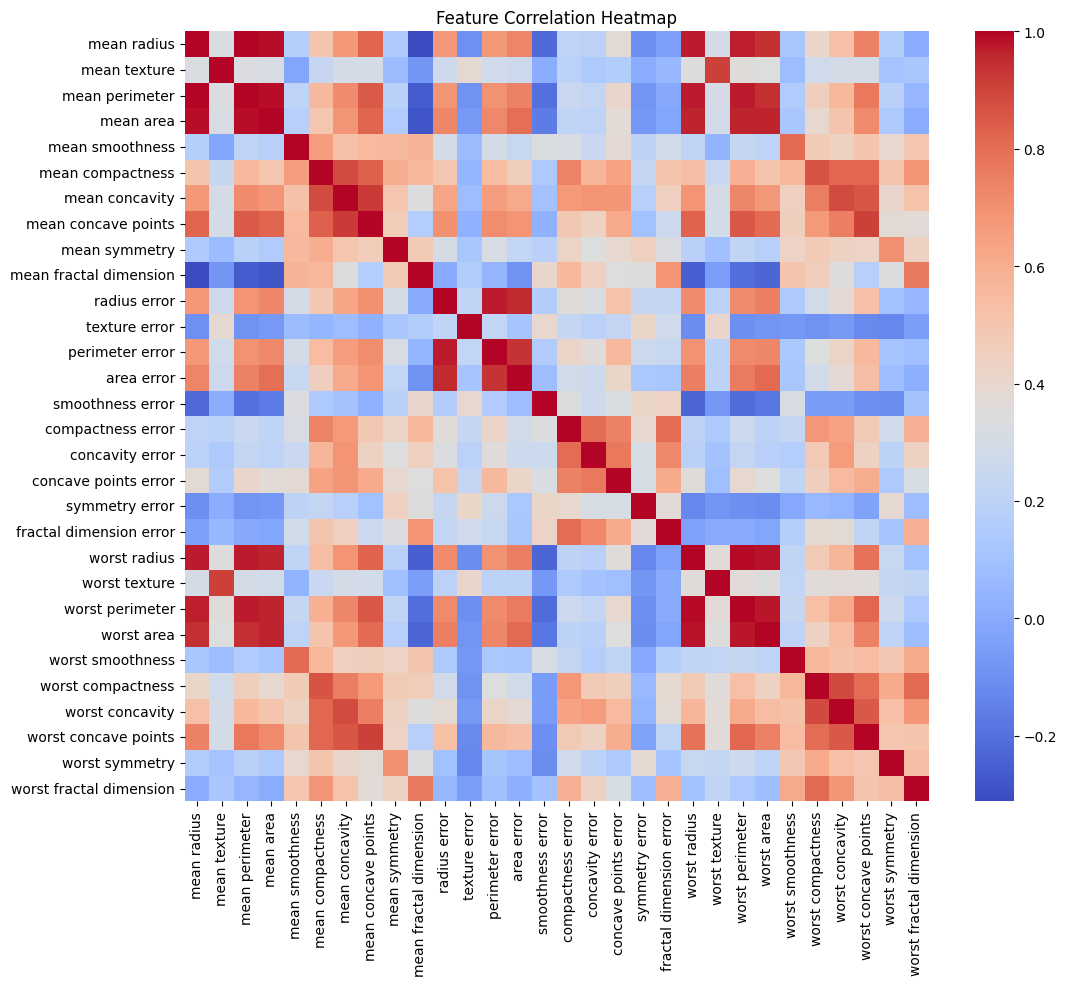

Training size: 455, Test size: 114


<Figure size 640x480 with 0 Axes>

In [4]:
# load breast cancer dataset
# this is already part of sklearn, so we can directly load it without needing to upload it as a csv file, will test it with uploaded test data later.
brest_cancer_data = load_breast_cancer()
df = pd.DataFrame(brest_cancer_data.data, columns=brest_cancer_data.feature_names)
df['target'] = brest_cancer_data.target
print(df.columns)
X = df.drop(columns='target')
y = df['target']
print(y.value_counts())
plot_correlation_matrix(X)

df.to_csv("breast_cancer_wisconsin/data.csv", index=False) # save the test data for later use in the app.py file

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed = imputer.fit_transform(X=X)
X = pd.DataFrame(transformed, columns=X.columns)
joblib.dump(imputer, "model/imputer.pkl") # save the imputer for later use in the app.py file

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
joblib.dump(scaler, "model/scaler.pkl") # save the scaler for later use in the app.py file

# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)
training_size = X_train.shape[0]
test_size = X_test.shape[0]


print(f"Training size: {training_size}, Test size: {test_size}")


In [5]:
# evaluate the models using y_pred, y_true and y_proba
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba) 
    mcc = matthews_corrcoef(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    
    return accuracy, precision, recall, f1, roc_auc, mcc

# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [6]:
# implement a simple logistic regression model first, will add more models later.
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
y_lr_prob = lr_model.predict_proba(X_test)[:, 1] # probability of the positive class

print(y_lr_prob[:10])
print(y_lr_pred[:10])


[8.85345694e-01 8.74244925e-06 3.06418819e-03 9.99498478e-01
 9.99940150e-01 9.10729855e-11 1.50144666e-09 3.52284199e-02
 6.20835667e-01 9.99254633e-01]
[1 0 0 1 1 0 0 0 1 1]


In [7]:
joblib.dump(lr_model, "model/lr_model.pkl")

['model/lr_model.pkl']

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
ROC AUC Score: 0.9974
Matthews Correlation Coefficient: 0.9439


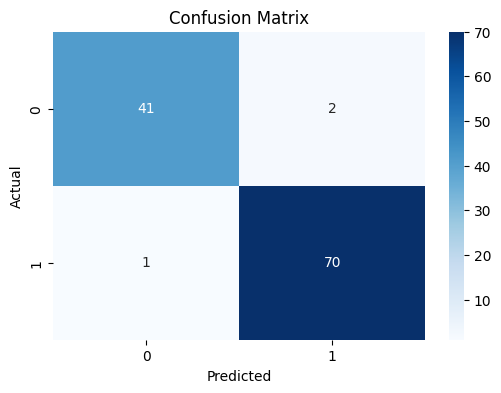

In [8]:
# evaluation metrics
evaluate_model(y_true=y_test, y_pred=y_lr_pred, y_proba=y_lr_prob)
# plot confusion matrix 
plot_confusion_matrix(y_true=y_test, y_pred=y_lr_pred)

Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
ROC AUC Score: 0.9974
Matthews Correlation Coefficient: 0.9253


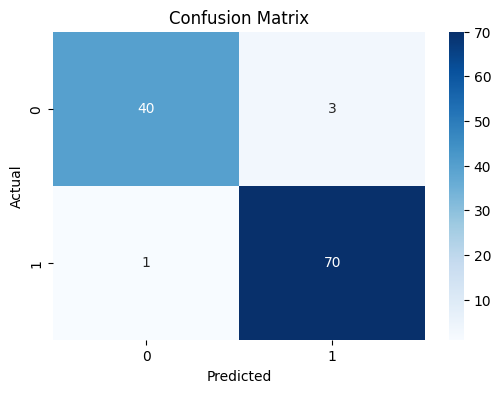

In [9]:
# implement naive bayes classifier - gaussian or multinomial, will test both and see which one performs better on this dataset, will add more models later.
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)
y_nb_proba = nb_model.predict_proba(X_test)[:,1]
# evaluate the model
evaluate_model(y_true= y_test, y_pred=y_nb_pred, y_proba=y_nb_proba)

# draw confusion matrix
plot_confusion_matrix(y_true=y_test, y_pred=y_nb_pred)


In [10]:
joblib.dump(nb_model, "model/nb_model.pkl")

['model/nb_model.pkl']

Accuracy: 0.9474
Precision: 0.9452
Recall: 0.9718
F1 Score: 0.9583
ROC AUC Score: 0.9574
Matthews Correlation Coefficient: 0.8876


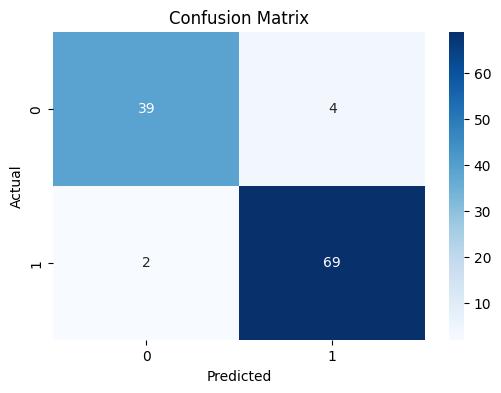

In [11]:
# implement a Decision Tree Classifier now
from sklearn.tree import DecisionTreeClassifier

dcf = DecisionTreeClassifier(random_state=42, max_depth=3)
dcf.fit(X=X_train, y=y_train)
y_dcf_pred = dcf.predict(X=X_test)
y_dcf_proba = dcf.predict_proba(X=X_test)[:,1] # since binary classificaiton

# evaluate 
evaluate_model(y_true=y_test, y_pred=y_dcf_pred, y_proba=y_dcf_proba)

# make confusion matrix
plot_confusion_matrix(y_true=y_test, y_pred=y_dcf_pred)

In [12]:
joblib.dump(dcf, "model/dcf_model.pkl")

['model/dcf_model.pkl']

Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1 Score: 0.9577
ROC AUC Score: 0.9825
Matthews Correlation Coefficient: 0.8880


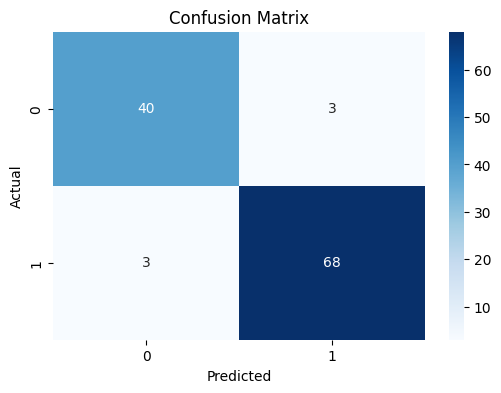

In [13]:
# implement KNN instance learning
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y=y_train)
y_knn_pred = knn_model.predict(X_test)
y_knn_proba = knn_model.predict_proba(X_test)[:, 1]
# evaluate the matrix
evaluate_model(y_true=y_test, y_pred=y_knn_pred, y_proba=y_knn_proba)

#draw confusion matrix
plot_confusion_matrix(y_true= y_test, y_pred=y_knn_pred)

In [14]:
joblib.dump(knn_model, "model/knn_model.pkl")

['model/knn_model.pkl']

Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
ROC AUC Score: 0.9977
Matthews Correlation Coefficient: 0.9253


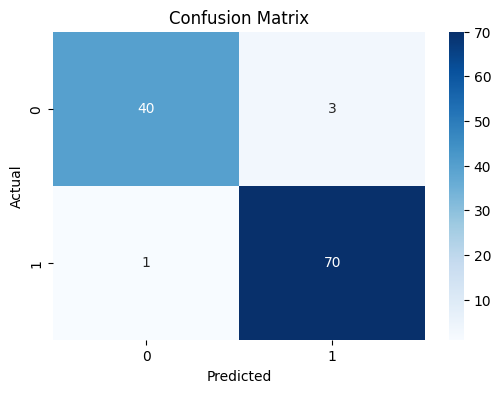

In [15]:
# implement random forest
from sklearn.ensemble import RandomForestClassifier

# bagging with 25% of samples, take only sqrt(30) = 5 features to build the single decision stump (estimator)
rfc_model = RandomForestClassifier(max_depth=4, n_estimators=100, \
                                   max_features="sqrt", n_jobs=3, \
                                    random_state=42, max_samples=.25) 
rfc_model.fit(X=X_train, y=y_train)
y_rfc_pred = rfc_model.predict(X=X_test)
y_rfc_proba = rfc_model.predict_proba(X=X_test)[:,1]

#evaluate the model
evaluate_model(y_pred=y_rfc_pred, y_true=y_test, y_proba=y_rfc_proba)

# plot confusion matrix 
plot_confusion_matrix(y_true=y_test, y_pred=y_rfc_pred)

In [16]:
# save the model (pickle file)
joblib.dump(rfc_model, "model/rfc_model.pkl")

['model/rfc_model.pkl']

/home/dvipin2/dev/miniconda3/envs/bits/lib/python3.12/site-packages/xgboost/training.py:200: UserWarning: [08:53:37] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9561
Precision: 0.9583
Recall: 0.9718
F1 Score: 0.9650
ROC AUC Score: 0.9928
Matthews Correlation Coefficient: 0.9064


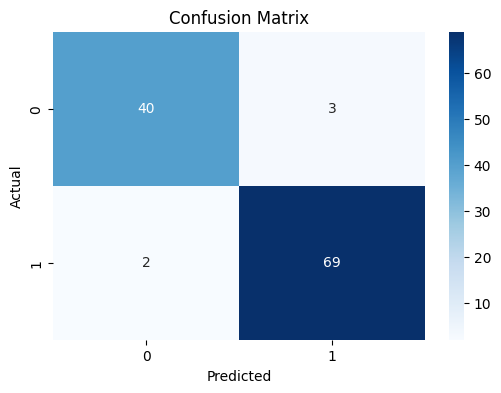

In [17]:
# let's do the last one finally ;) , XGBoost
# sklearn doesn't provide one, we need to do it via xgboost lib
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)

xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_proba = xgb_model.predict_proba(X_test)[:,1]

#evaluation matrices
evaluate_model(y_true=y_test, y_pred=y_xgb_pred, y_proba=y_xgb_proba)

# plot confusion matrix
plot_confusion_matrix(y_test, y_xgb_pred)


In [18]:
joblib.dump(xgb_model, "model/xgb_model.pkl") # xgb model

['model/xgb_model.pkl']

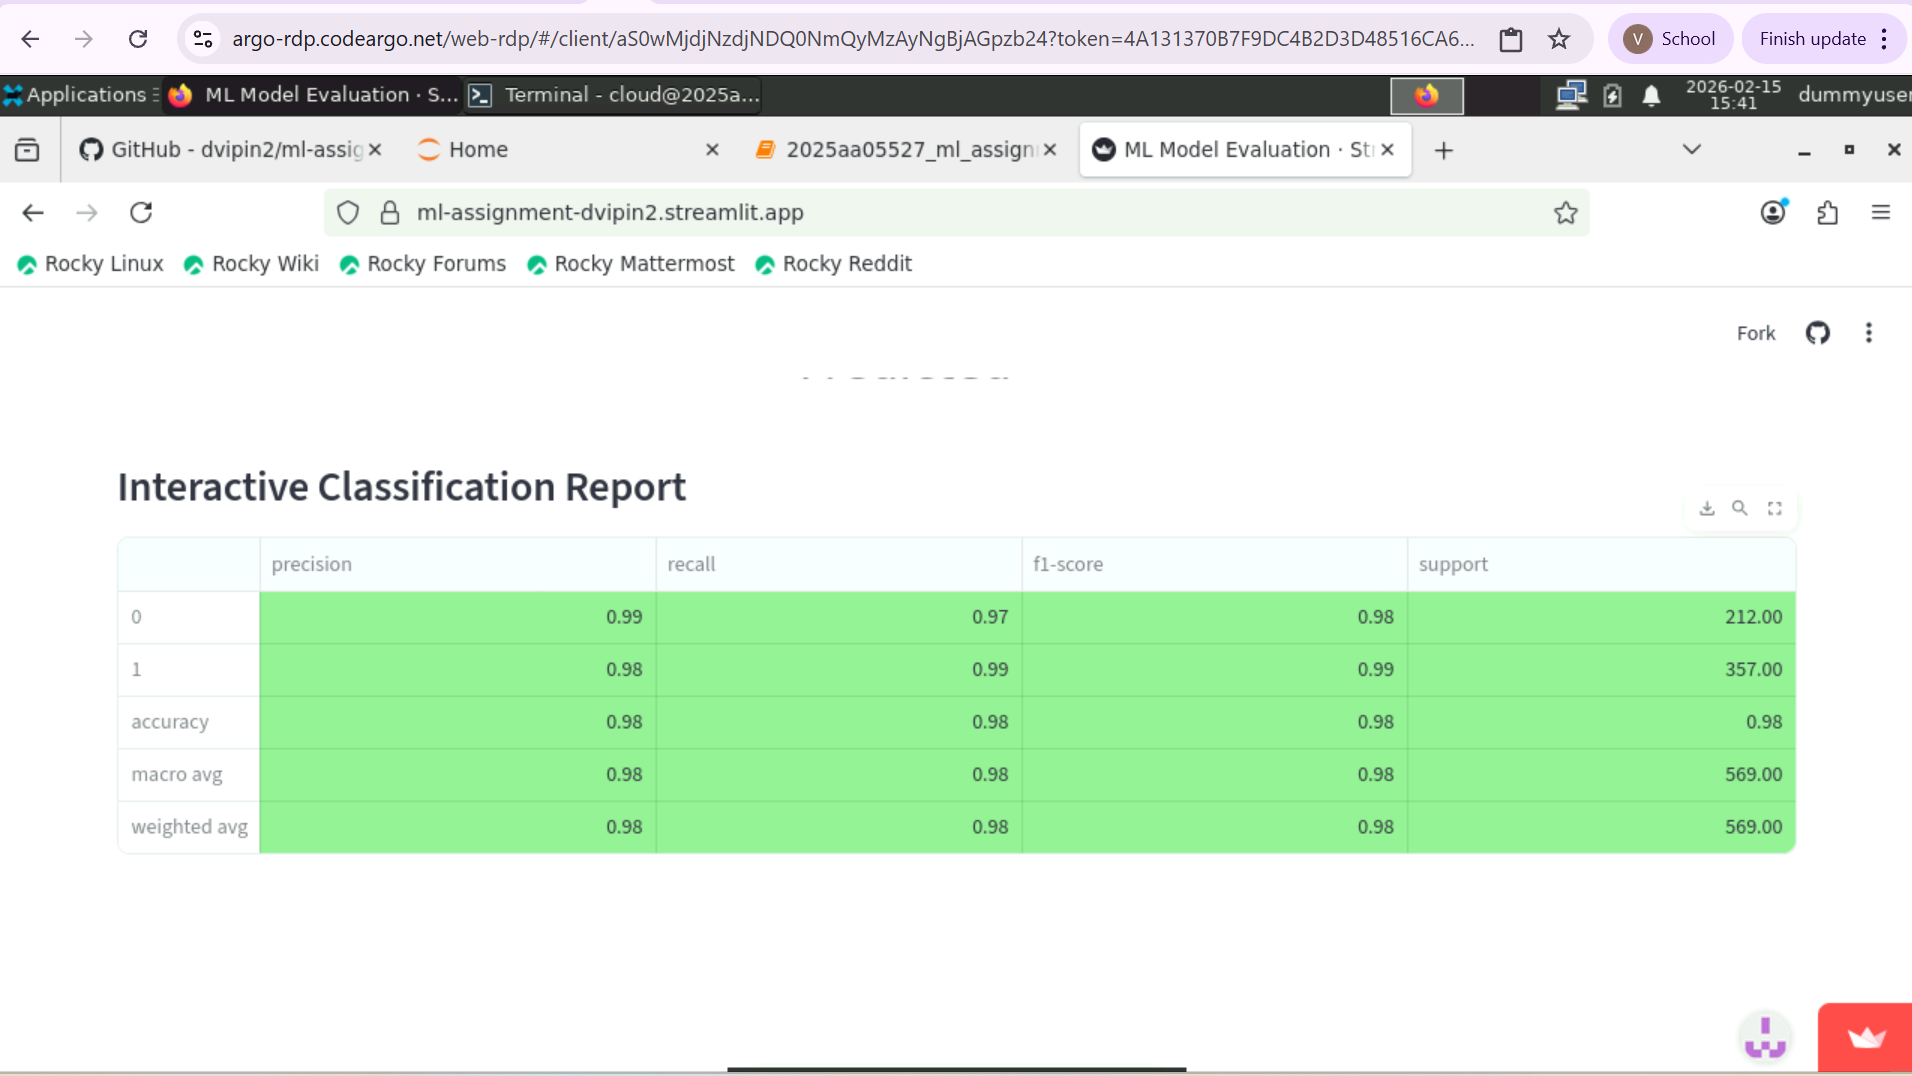
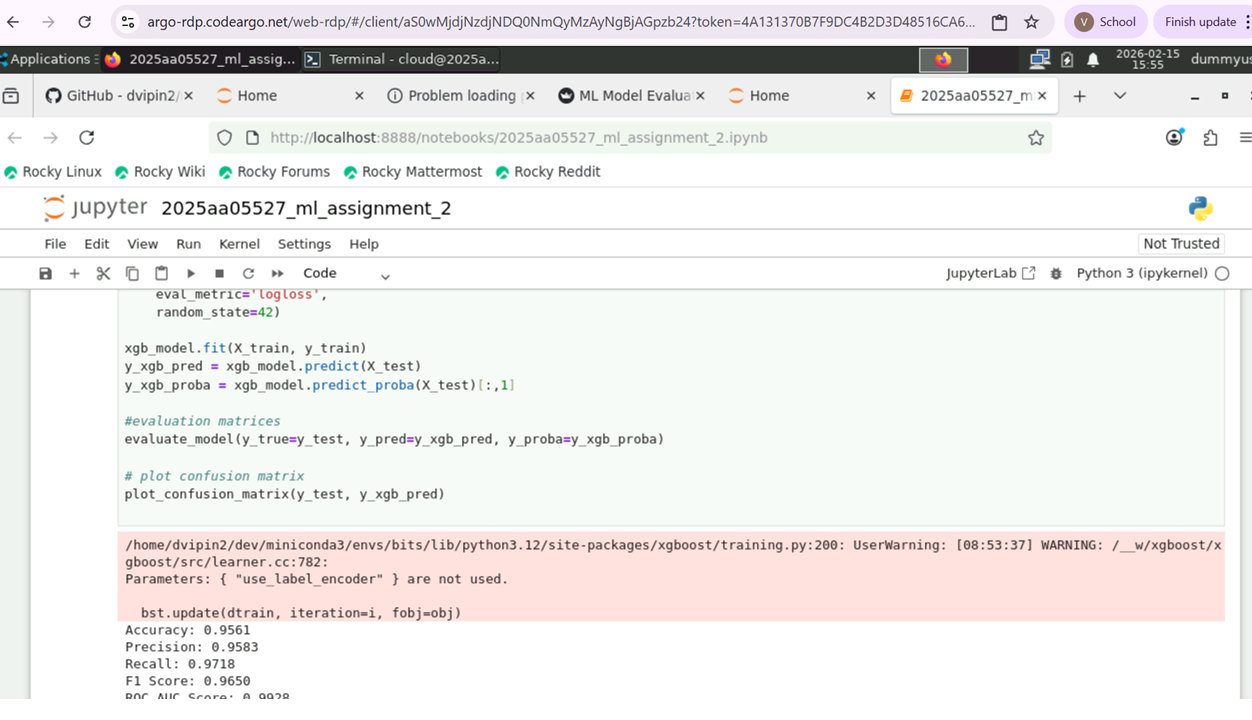